In [167]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

pd.set_option('display.max_columns', None)  

In [221]:
wnba = pd.read_csv('WNBA Stats.csv')
display(wnba.head())
display(wnba.info())
wnba.shape

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

None

(143, 32)

In [10]:
parameter = wnba['Games Played'].max()

In [46]:
sample = wnba.sample(n=30, random_state =1)
statistic = sample['Games Played'].max()
sampling_error = parameter - statistic
sampling_error

2

In [72]:
wnba['PTS'].sample(10).mean()

285.7

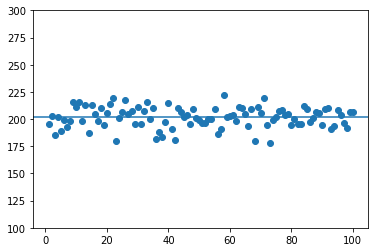

178.12

222.05

In [135]:
sample_mean = []
sample_size =[10,20,30,40,50,60,70,80]
for i in range(100):
    sample = wnba['PTS'].sample(100, random_state=i)
    sample_mean.append(sample.mean())

population_mean = wnba['PTS'].mean()


plt.scatter(x=range(1,101), y = sample_mean)
plt.axhline(population_mean)
plt.ylim(ymax=300, ymin=100)
plt.show()

display(min(sample_mean), max(sample_mean))

In [137]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [138]:
wnba['PPG'] = wnba['PTS']/wnba['Games Played']

In [140]:
wnba.groupby('Pos').mean()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,PPG
Pos,,,,,,,,,,,,,,,,,,,,,,,,,,
C,194.920000,91.960000,24.218123,26.360000,22.720000,420.600000,65.960000,131.280000,46.044000,4.840000,15.600000,15.888000,33.200000,42.600000,68.092000,32.280000,66.160000,98.440000,22.680000,12.080000,14.880000,27.120000,169.960000,1.520000,0.000000,6.506023
F,188.484848,83.090909,23.391540,26.787879,23.696970,488.666667,75.787879,167.272727,44.133333,12.515152,37.636364,20.357576,42.272727,53.545455,75.300000,28.090909,72.515152,100.606061,31.484848,18.484848,9.939394,28.666667,206.363636,1.636364,0.000000,7.992760
F/C,191.750000,85.916667,23.428497,27.416667,22.750000,456.500000,83.250000,172.333333,51.075000,12.166667,34.500000,30.191667,40.250000,53.333333,64.775000,23.000000,82.750000,105.750000,36.583333,13.750000,13.166667,32.333333,218.916667,2.583333,0.083333,7.942784
G,176.450000,70.067797,22.494379,27.083333,25.050000,522.483333,74.016667,180.350000,39.470000,20.016667,59.200000,29.185000,41.916667,50.683333,80.523333,13.700000,47.450000,61.150000,62.233333,19.500000,6.300000,35.750000,209.966667,0.533333,0.000000,8.183391
G/F,185.538462,77.615385,22.559094,28.846154,27.461538,584.538462,75.153846,175.307692,42.023077,17.307692,47.076923,28.038462,30.230769,39.230769,77.830769,23.307692,66.076923,89.384615,42.000000,20.846154,11.769231,33.230769,197.846154,0.538462,0.000000,6.844948


In [164]:
stratum_F = wnba[wnba['Pos']=='F']
stratum_GF = wnba[wnba['Pos']=='G/F'] 
stratum_G = wnba[wnba['Pos']=='G'] 
stratum_C = wnba[wnba['Pos']=='C'] 
stratum_FC = wnba[wnba['Pos']=='F/C']

points_per_position = {}
for stratum, position in [(stratum_F,'F'),(stratum_GF,'G/F'),(stratum_G,'G'),(stratum_C,'C'),(stratum_FC,'F/C')]:
    stratum_mean = stratum['PPG'].sample(10,random_state=0).mean()
    points_per_position[position] = stratum_mean

points_per_position
position_most_points = max(points_per_position.items(),key=operator.itemgetter(1))[0]

'C'

In [165]:
print(wnba['Games Played'].min())

2


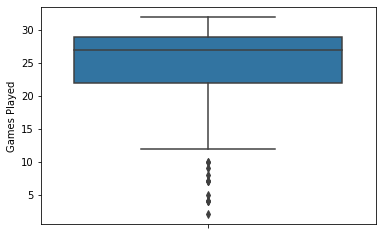

In [169]:
sns.boxplot(y=wnba['Games Played'])

In [170]:
wnba['Games Played'].value_counts(bins=3, normalize = True)*100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

In [193]:
wnba.head()
_22_and_over = wnba[wnba['Games Played']>22]
_12_to_22 = wnba[ (wnba['Games Played']>12) & (wnba['Games Played']<=22)]
_12_or_fewer = wnba[wnba['Games Played']<=12]


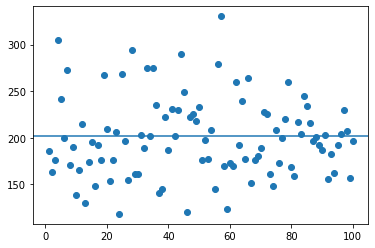

In [200]:
proportional_sampling_means = []
for i in range(100):
    _22_and_over_sample = _22_and_over['PTS'].sample(7, random_state = i)
    _12_to_22_sample = _12_to_22['PTS'].sample(2, random_state = i)
    _12_or_fewer_sample = _12_or_fewer['PTS'].sample(1, random_state = i)
    final_sample = pd.concat([_22_and_over_sample, _12_to_22_sample,_12_or_fewer_sample])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(x=range(1,101), y = sample_mean)
plt.axhline(wnba['PTS'].mean())
plt.show()    

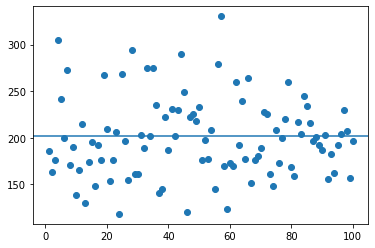

In [197]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [202]:
#stratify using the minutes played by a player 
wnba.head()
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

In [235]:
pd.Series(wnba['Team'].unique()).sample(4, random_state=0)
cluster_data = pd.DataFrame()
for cluster in wnba['Team'].unique():
    team_data = wnba[wnba['Team']== cluster]
    cluster_data = cluster_data.append(team_data)


In [236]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 140
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [237]:
mean_height= cluster_data['Height'].mean()
mean_age = cluster_data['Age'].mean()
mean_bmi = cluster_data['BMI'].mean()
mean_TPS = cluster_data['PTS'].mean()

In [240]:
cluster_data.isnull().sum()
cluster_data.head()
cluster_data.dropna()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
8,Allisha Gray,DAL,G,185,76.0,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
18,Breanna Lewis,DAL,C,196,93.0,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0
36,Courtney Paris,DAL,C,193,113.0,30.336385,US,"September 21, 1987",29,Oklahoma,7,16,217,32,57,56.1,0,0,0.0,6,12,50.0,28,34,62,5,6,8,18,70,0,0
55,Evelyn Akhator,DAL,F,191,82.0,22.477454,NG,"March 2, 1995",22,Kentucky,R,30,926,165,365,45.2,20,60,33.3,92,117,78.6,73,199,272,50,37,13,67,442,13,0
